# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100) #一維資料
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100) #二維資料
print(y.shape)

(100,)


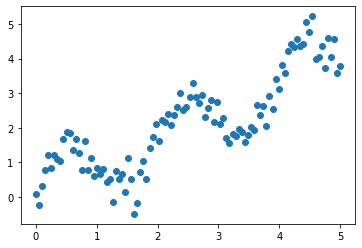

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1) #變成二維資料
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y) 
#進去機器學習
#為什麼是放小寫的y呢? 因為小寫的y變數才是原始正確答案  .fit是要來訓練，所以放入特徵值X跟正確答案y

LinearRegression()

0.5524214279852923


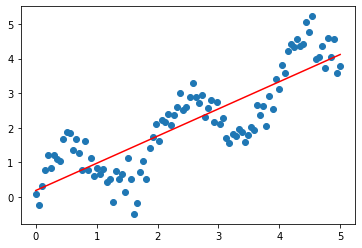

In [7]:
Y=regr_lin.predict(X) #預測目標值
plt.scatter(x,y) #原始資料分布
plt.plot(x,Y , color='r') #預測值呈現的線 #用小寫的x目的是畫一條紅斜線當基準而已
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

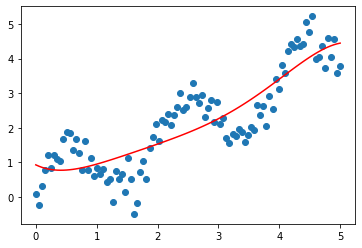

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_) #總共有五個斜率
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.85036913  1.38976347 -0.65498457  0.14788606 -0.01200984]
interception:  0.9311745857351501


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_

np.dot(X_poly,W.T)+b #.T 轉置100x5, 5x1 才能相乘

array([0.93117459, 0.89168818, 0.85879876, 0.8320341 , 0.81094411,
       0.79510038, 0.7840957 , 0.77754359, 0.77507781, 0.7763519 ,
       0.78103871, 0.78882991, 0.79943555, 0.81258353, 0.82801919,
       0.8455048 , 0.86481907, 0.88575672, 0.90812799, 0.93175815,
       0.95648704, 0.9821686 , 1.00867039, 1.03587311, 1.06367014,
       1.09196707, 1.1206812 , 1.14974109, 1.17908609, 1.20866584,
       1.23843982, 1.26837686, 1.2984547 , 1.32865947, 1.35898525,
       1.38943357, 1.42001296, 1.45073848, 1.48163121, 1.51271781,
       1.54403006, 1.57560432, 1.60748113, 1.63970471, 1.67232245,
       1.70538451, 1.73894327, 1.77305292, 1.80776893, 1.84314764,
       1.87924571, 1.91611973, 1.95382566, 1.99241844, 2.03195145,
       2.07247608, 2.11404123, 2.15669285, 2.20047345, 2.24542167,
       2.29157174, 2.33895305, 2.38758969, 2.43749994, 2.4886958 ,
       2.54118254, 2.59495822, 2.65001319, 2.70632965, 2.76388117,
       2.8226322 , 2.8825376 , 2.94354218, 3.00558022, 3.06857

In [15]:
regr_poly.predict(X_poly) #第二種方法

array([0.93117459, 0.89168818, 0.85879876, 0.8320341 , 0.81094411,
       0.79510038, 0.7840957 , 0.77754359, 0.77507781, 0.7763519 ,
       0.78103871, 0.78882991, 0.79943555, 0.81258353, 0.82801919,
       0.8455048 , 0.86481907, 0.88575672, 0.90812799, 0.93175815,
       0.95648704, 0.9821686 , 1.00867039, 1.03587311, 1.06367014,
       1.09196707, 1.1206812 , 1.14974109, 1.17908609, 1.20866584,
       1.23843982, 1.26837686, 1.2984547 , 1.32865947, 1.35898525,
       1.38943357, 1.42001296, 1.45073848, 1.48163121, 1.51271781,
       1.54403006, 1.57560432, 1.60748113, 1.63970471, 1.67232245,
       1.70538451, 1.73894327, 1.77305292, 1.80776893, 1.84314764,
       1.87924571, 1.91611973, 1.95382566, 1.99241844, 2.03195145,
       2.07247608, 2.11404123, 2.15669285, 2.20047345, 2.24542167,
       2.29157174, 2.33895305, 2.38758969, 2.43749994, 2.4886958 ,
       2.54118254, 2.59495822, 2.65001319, 2.70632965, 2.76388117,
       2.8226322 , 2.8825376 , 2.94354218, 3.00558022, 3.06857

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution #center=平均值 sigma=標準差
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

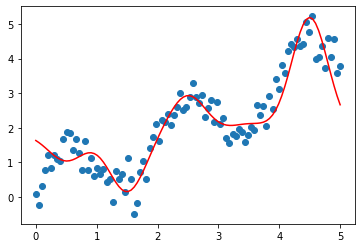

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.78121375 -1.67563333  1.10866008  0.27475522  3.35942067]
interception:  1.8293507362421226


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

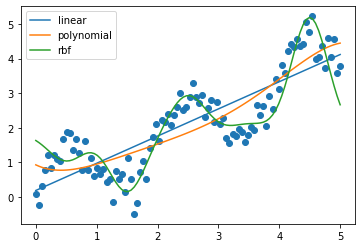

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5524214279852923


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.48412585164908684


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2842375882266528
